# Color cycling
We will try to fake a subtle animation of the water in this public domain image:

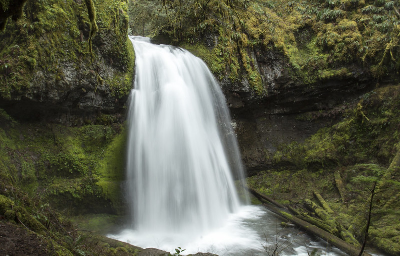

In [1]:
using Images
using DitherPunk
using IndirectArrays

img = load("../../assets/waterfall.png")

We import DitherPunk's internal function `get_colorscheme` to obtain a color scheme:

In [2]:
ncolors = 16
cs = DitherPunk.get_colorscheme(img, ncolors)
cs = sort(cs; by=c -> -c.l)

The first three colors are white-ish and correspond to the water.

Let's look at the dithered result using `color_error_multiplier=1.0`
for a more visible dithering pattern:

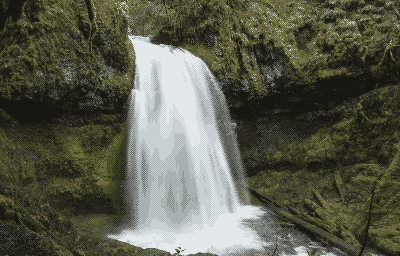

In [3]:
d1 = dither(img, Bayer(;color_error_multiplier=1.0), cs)

We create two more frames by cycling the first three colors

In [4]:
d2 = IndirectArray(d1.index, cs[[3, 1, 2, 4:end...]])
d3 = IndirectArray(d1.index, cs[[2, 3, 1, 4:end...]]);

And finally create a gif out of the modified images:

In [5]:
ds = cat(d1, d2, d3; dims=3)
save("waterfall.gif", ds; fps=5)

The result should look like this:

![](https://i.imgur.com/nFpH89N.gif)

We really nailed that Web 1.0 look!

To see how good color cycling can look when it is hand-drawn by a professional, take a look at
[Mark Ferrari's amazing work](http://www.effectgames.com/demos/canvascycle/?sound=1).

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*